# Medical Assurance Price Predictor
This project about the predicting the price of the Medical Assurance, which will be very help full for them who want to estimate the total cost of there assurance before buying it, which help them to make there mind about the decision of buying a assurance or not it, It is very helpfull for middleclass familles.

### Motive behind this project:
This project for practice purpose and imporoving the skills of mine, and having a great understanding of how ML models works, which is helpfull for me overall. 

In [29]:
# Import every libraries which we will be needed here.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [30]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
df.shape

(1338, 7)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
# Remember we can't feed string data to machine, it's only takes numeric value.
# For that we are going to convert some values like female and male into 0 and 1. 
# By using replace method here.

df['sex'].replace({'female':0, 'male':1}, inplace=True)
df['smoker'].replace({'no':0, 'yes':1}, inplace=True)

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [36]:
df.groupby('region').describe()

age                                                         sex  \
           count       mean        std   min    25%   50%   75%   max  count   
region                                                                         
northeast  324.0  39.268519  14.069007  18.0  27.00  39.5  51.0  64.0  324.0   
northwest  325.0  39.196923  14.051646  19.0  26.00  39.0  51.0  64.0  325.0   
southeast  364.0  38.939560  14.164585  18.0  26.75  39.0  51.0  64.0  364.0   
southwest  325.0  39.455385  13.959886  19.0  27.00  39.0  51.0  64.0  325.0   

                     ... smoker      charges                              \
               mean  ...    75%  max   count          mean           std   
region               ...                                                   
northeast  0.503086  ...   0.00  1.0   324.0  13406.384516  11255.803066   
northwest  0.495385  ...   0.00  1.0   325.0  12417.575374  11072.276928   
southeast  0.519231  ...   0.25  1.0   364.0  14735.411438  13971.098589   
southwest  0.501538  ...   0.00  1.0   325.0  12346.937377  11557.179101   

                                                                          
                 min          25%           50%         75%          max  
region                                                                    
northeast  1694.7964  5194.322288  10057.652025  16687.3641  58571.07448  
northwest  1621.3402  4719.736550   8965.795750  14711.7438  60021.39897  
southeast  1121.8739  4440.886200   9294.131950  19526.2869  63770.42801  
southwest  1241.5650  4751.070000   8798.593000  13462.5200  52590.82939  

[4 rows x 48 columns]

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()

In [38]:
# We are going to use LabelEncoder here to convert string values into num
# We chould have use replace method here too, It's depends on you. 

df['region'] = encoder.fit_transform(df['region'])

In [39]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1118,33,1,35.750,1,1,2,38282.74950
510,56,1,32.110,1,0,0,11763.00090
228,41,0,31.635,1,0,0,7358.17565
931,39,0,32.500,1,0,3,6238.29800
405,52,0,38.380,2,0,0,11396.90020
338,50,1,32.300,1,1,0,41919.09700
371,57,0,22.230,0,0,0,12029.28670
491,61,0,25.080,0,0,2,24513.09126
459,40,0,33.000,3,0,2,7682.67000
786,60,1,36.955,0,0,0,12741.16745


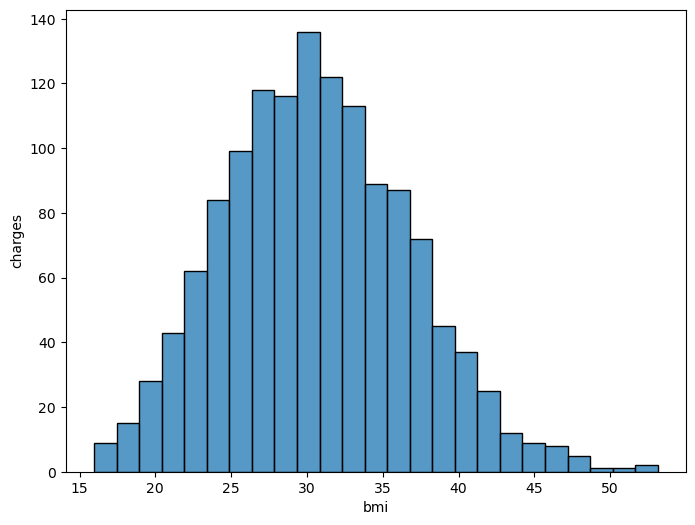

In [40]:
# We are using plt and sns for better understanding of the data with the help of visuals.

plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'])
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

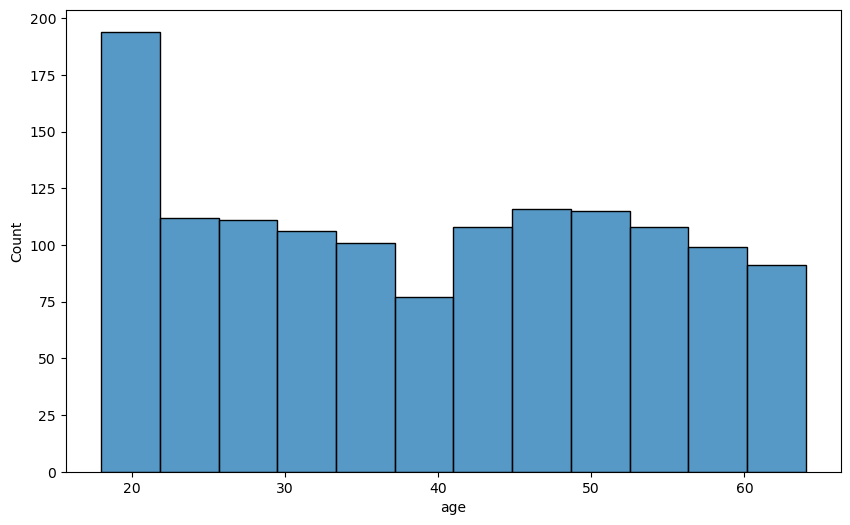

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'])
plt.xlabel('age')

plt.show()

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

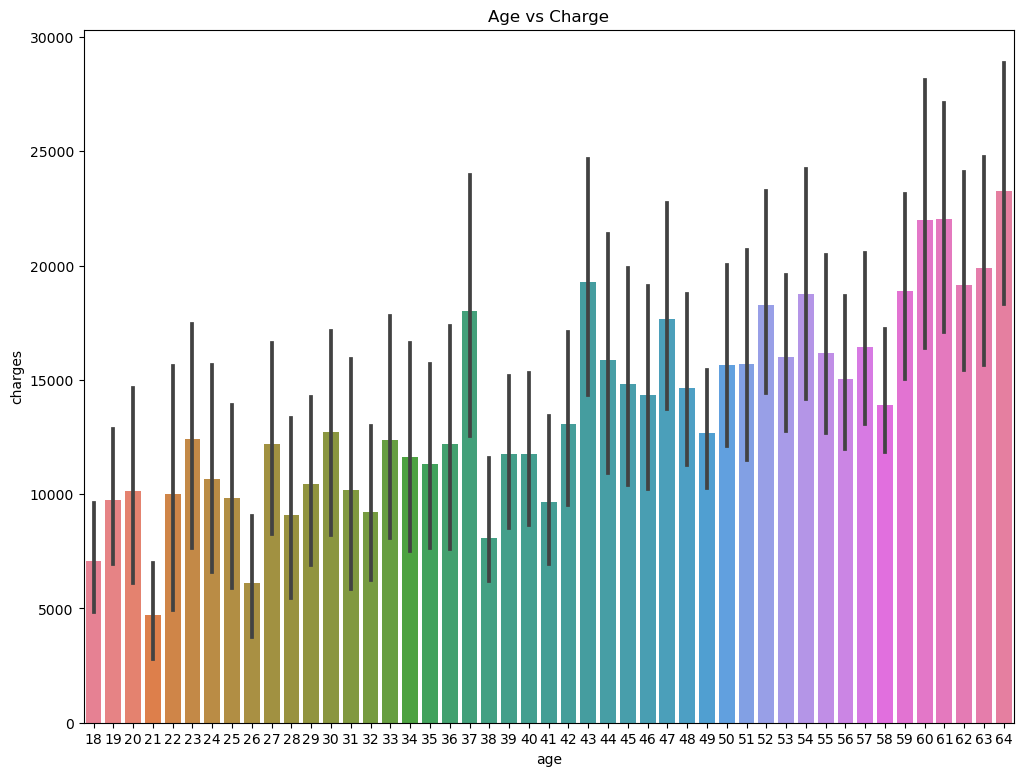

In [42]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette='husl')

<Axes: title={'center': 'Age vs Charge'}, xlabel='sex', ylabel='charges'>

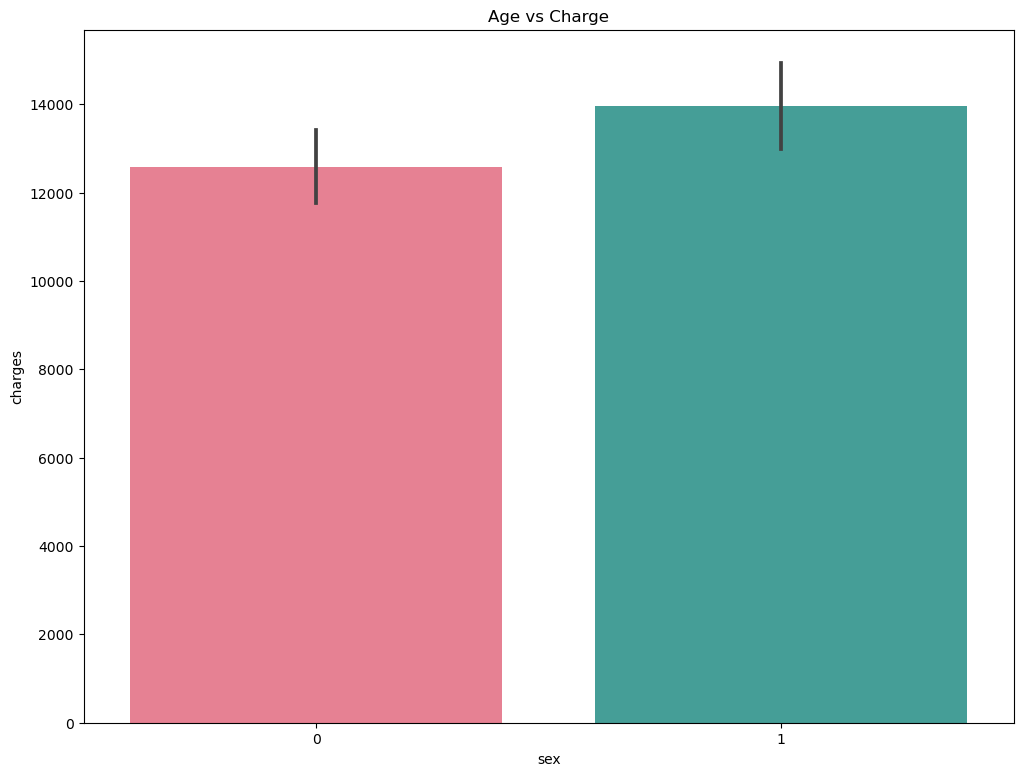

In [43]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='sex',y='charges',data=df,palette='husl')

<Axes: title={'center': 'Age vs Charge'}, xlabel='children', ylabel='charges'>

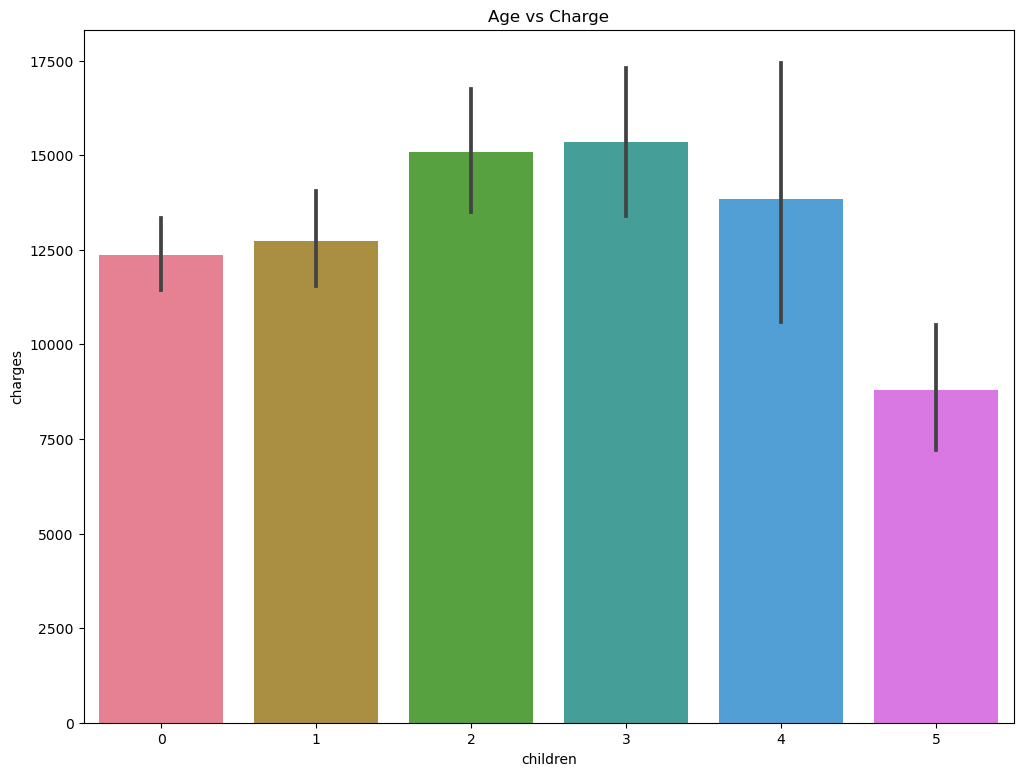

In [44]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='children',y='charges',data=df,palette='husl')

<Axes: title={'center': 'Age vs Charge'}, xlabel='smoker', ylabel='charges'>

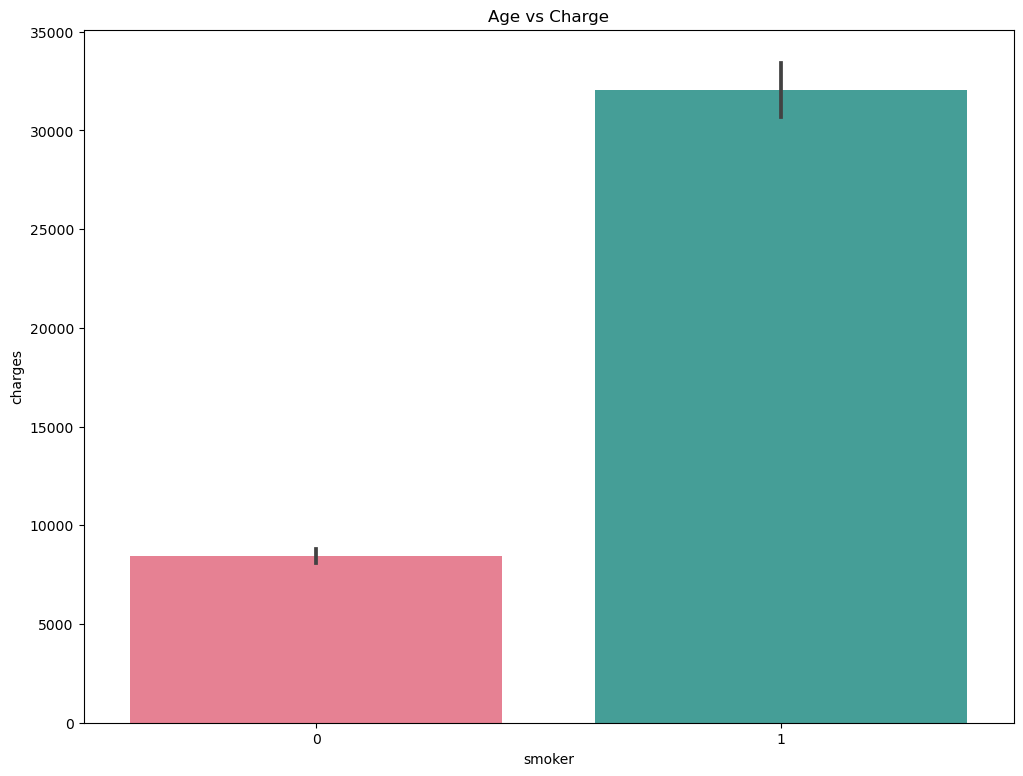

In [45]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='husl')

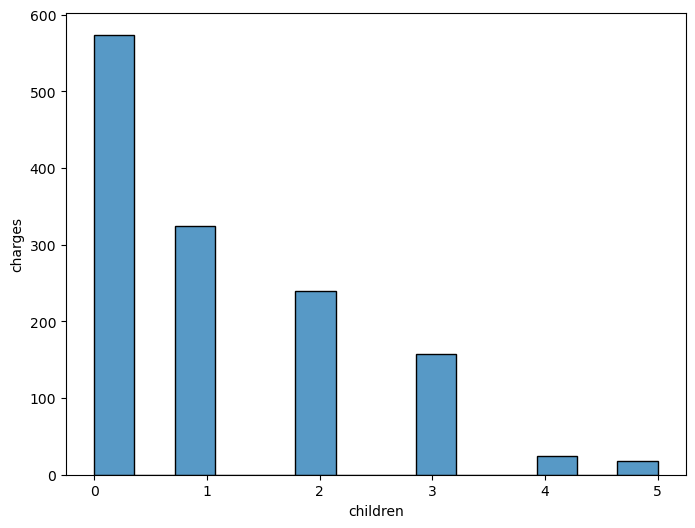

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(df['children'])
plt.xlabel('children')
plt.ylabel('charges')
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 68.1 KB


In [48]:
# Now it's time for training and testing, let's prepare x for data and y for target.
x = df.drop(columns='charges', axis=1)
y = df.charges

In [49]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [50]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [51]:
# We are using train_test_split function for dividing our data for testing and training. 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [52]:
# I am using Two most popular algorithm here, though there are othere's too and I urge to try those algorithms too.

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [53]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

LinearRegression()

In [54]:
score_training_1 = model_1.score(x_train, y_train)
score_testing_1 = model_1.score(x_test, y_test)
print('The Score for Training 1: ', score_training_1)
print('The Score for Training 1: ', score_testing_1)

The Score for Training 1:  0.7417049283233981
The Score for Training 1:  0.7833463107364539


In [55]:
model_2 = RandomForestRegressor(n_estimators=50, random_state=42)
model_2.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [56]:
score_training_2 = model_2.score(x_train, y_train)
score_testing_2 = model_2.score(x_test, y_test)
print('The Score for Training 2: ', score_training_2)
print('The Score for Training 2: ', score_testing_2)

The Score for Training 2:  0.9728892233591157
The Score for Training 2:  0.8637203814215658



Here you can see RandomForestRegression is best choice, So we are going to Chose model_2 for deployment in the future 